In [1]:
import re
from os.path import join
from IPython.display import display

import matplotlib.pyplot as plt
import joblib
import pandas as pd
import numpy as np
import torch
import torch.utils.data as data_utils
from matplotlib.colors import ListedColormap

from lolip.models.torch_utils.archs import *
from lolip.variables import auto_var
from lolip.models.torch_model import TorchModel
from utils import params_to_dataframe

Train accuracy:  0.9933333333333333
Test accuracy:  0.988


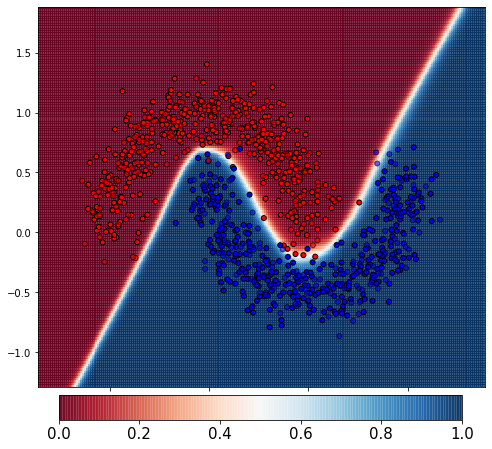

In [5]:
h = 0.02
def plot_boundary(clf, X, y, X_test, y_test):
    fig, ax = plt.subplots(figsize=(8, 7))

    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    #imshow_handle = plt.contourf(xx, yy, Z, cmap=cm, alpha=.8, vmin=0, vmax=1)
    imshow_handle = plt.pcolormesh(xx, yy, Z, cmap=cm, alpha=.8, vmin=0, vmax=1)
    imshow_handle.set_clim(0.0, 1.0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright,
               edgecolors='black', s=25)
    # and testing points
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
               alpha=0.6, edgecolors='black', s=25)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    #ax.set_xticks(())
    #ax.set_yticks(())
    
    ax = plt.axes([0.16, 0.06, 0.7, 0.05])
    #plt.title("Probability")
    cbar = plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')
    cbar.ax.tick_params(labelsize=15) 
    
plot_boundary(model, trnX, trny, tstX, tsty)
print("Train accuracy: ", (model.predict(trnX) == trny).mean())
print("Test accuracy: ", (model.predict(tstX) == tsty).mean())

plt.savefig("./figs/halfmoon_proba.png", transparent=True)

In [3]:
auto_var.set_variable_value("random_seed", 0)
trnX, trny, tstX, tsty = auto_var.get_var_with_argument("dataset", "halfmoon-1000-0.15")
#model = TorchModel(lbl_enc=None, n_features=(2, ), n_classes=2, loss_name="ce", architecture="LargeMLP", epochs=120, learning_rate=1e-2, device="cpu", batch_size=64)
model = TorchModel(lbl_enc=None, n_features=(2, ), n_classes=2, loss_name="advce", architecture="LargeMLP", epochs=120, learning_rate=1e-2, device="cpu", batch_size=64, eps=0.005, norm=np.inf)
#model = TorchModel(lbl_enc=None, n_features=(2, ), n_classes=2, loss_name="stradesce", architecture="LargeMLP", epochs=120, learning_rate=1e-2, device="cpu", batch_size=64, eps=0.005, norm=np.inf)
_ = model.fit(trnX, trny, verbose=0)
print((model.predict(trnX) == trny).mean())

Epoch 1:   0%|          | 0/12 [00:00<?, ?it/s]

lr: 0.01, opt: sgd, loss: advce, arch: LargeMLP, dataaug: None, batch_size: 64


Epoch 2:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 1/120, train loss: 0.423, train acc: 0.812


Epoch 3:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 2/120, train loss: 0.254, train acc: 0.901


Epoch 4:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 3/120, train loss: 0.237, train acc: 0.923


Epoch 5:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 4/120, train loss: 0.174, train acc: 0.939


Epoch 6:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 5/120, train loss: 0.122, train acc: 0.955


Epoch 7:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 6/120, train loss: 0.236, train acc: 0.916


Epoch 8:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 7/120, train loss: 0.144, train acc: 0.947


Epoch 9:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 8/120, train loss: 0.074, train acc: 0.976


Epoch 10:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 9/120, train loss: 0.226, train acc: 0.937


Epoch 11:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 10/120, train loss: 0.079, train acc: 0.971


Epoch 12:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 11/120, train loss: 0.068, train acc: 0.977


Epoch 13:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 12/120, train loss: 0.059, train acc: 0.976


Epoch 14:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 13/120, train loss: 0.061, train acc: 0.977


Epoch 15:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 14/120, train loss: 0.052, train acc: 0.973


Epoch 16:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 15/120, train loss: 0.099, train acc: 0.959


Epoch 17:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 16/120, train loss: 0.116, train acc: 0.953


Epoch 18:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 17/120, train loss: 0.053, train acc: 0.980


Epoch 19:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 18/120, train loss: 0.044, train acc: 0.984


Epoch 20:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 19/120, train loss: 0.053, train acc: 0.983


Epoch 21:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 20/120, train loss: 0.039, train acc: 0.991


Epoch 22:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 21/120, train loss: 0.053, train acc: 0.977


Epoch 23:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 22/120, train loss: 0.053, train acc: 0.984


Epoch 24:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 23/120, train loss: 0.049, train acc: 0.984


Epoch 25:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 24/120, train loss: 0.041, train acc: 0.985


Epoch 26:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 25/120, train loss: 0.045, train acc: 0.981


Epoch 27:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 26/120, train loss: 0.045, train acc: 0.980


Epoch 28:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 27/120, train loss: 0.040, train acc: 0.987


Epoch 29:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 28/120, train loss: 0.043, train acc: 0.983


Epoch 30:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 29/120, train loss: 0.039, train acc: 0.985


Epoch 31:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 30/120, train loss: 0.041, train acc: 0.984


Epoch 32:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 31/120, train loss: 0.045, train acc: 0.983


Epoch 33:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 32/120, train loss: 0.050, train acc: 0.979


Epoch 34:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 33/120, train loss: 0.040, train acc: 0.985


Epoch 35:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 34/120, train loss: 0.037, train acc: 0.989


Epoch 36:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 35/120, train loss: 0.040, train acc: 0.984


Epoch 37:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 36/120, train loss: 0.036, train acc: 0.992


Epoch 38:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 37/120, train loss: 0.058, train acc: 0.975


Epoch 39:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 38/120, train loss: 0.036, train acc: 0.985


Epoch 40:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 39/120, train loss: 0.035, train acc: 0.984


Epoch 41:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.01
epoch: 40/120, train loss: 0.049, train acc: 0.973


Epoch 42:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 41/120, train loss: 0.083, train acc: 0.972


Epoch 43:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 42/120, train loss: 0.055, train acc: 0.981


Epoch 44:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 43/120, train loss: 0.043, train acc: 0.984


Epoch 45:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 44/120, train loss: 0.038, train acc: 0.983


Epoch 46:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 45/120, train loss: 0.036, train acc: 0.983


Epoch 47:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 46/120, train loss: 0.034, train acc: 0.985


Epoch 48:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 47/120, train loss: 0.034, train acc: 0.985


Epoch 49:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 48/120, train loss: 0.033, train acc: 0.987


Epoch 50:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 49/120, train loss: 0.032, train acc: 0.991


Epoch 51:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 50/120, train loss: 0.032, train acc: 0.988


Epoch 52:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 51/120, train loss: 0.031, train acc: 0.988


Epoch 53:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 52/120, train loss: 0.031, train acc: 0.991


Epoch 54:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 53/120, train loss: 0.031, train acc: 0.989


Epoch 55:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 54/120, train loss: 0.030, train acc: 0.988


Epoch 56:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 55/120, train loss: 0.030, train acc: 0.989


Epoch 57:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 56/120, train loss: 0.030, train acc: 0.989


Epoch 58:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 57/120, train loss: 0.030, train acc: 0.991


Epoch 59:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 58/120, train loss: 0.030, train acc: 0.988


Epoch 60:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 59/120, train loss: 0.030, train acc: 0.991


Epoch 61:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 60/120, train loss: 0.029, train acc: 0.988


Epoch 62:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 61/120, train loss: 0.029, train acc: 0.992


Epoch 63:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 62/120, train loss: 0.029, train acc: 0.989


Epoch 64:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 63/120, train loss: 0.029, train acc: 0.989


Epoch 65:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 64/120, train loss: 0.029, train acc: 0.991


Epoch 66:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 65/120, train loss: 0.029, train acc: 0.989


Epoch 67:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 66/120, train loss: 0.029, train acc: 0.991


Epoch 68:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 67/120, train loss: 0.029, train acc: 0.988


Epoch 69:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 68/120, train loss: 0.029, train acc: 0.989


Epoch 70:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 69/120, train loss: 0.028, train acc: 0.988


Epoch 71:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 70/120, train loss: 0.028, train acc: 0.989


Epoch 72:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 71/120, train loss: 0.029, train acc: 0.989


Epoch 73:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 72/120, train loss: 0.029, train acc: 0.989


Epoch 74:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 73/120, train loss: 0.028, train acc: 0.991


Epoch 75:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 74/120, train loss: 0.028, train acc: 0.989


Epoch 76:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 75/120, train loss: 0.029, train acc: 0.991


Epoch 77:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 76/120, train loss: 0.028, train acc: 0.991


Epoch 78:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 77/120, train loss: 0.028, train acc: 0.989


Epoch 79:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 78/120, train loss: 0.028, train acc: 0.991


Epoch 80:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 79/120, train loss: 0.028, train acc: 0.989


Epoch 81:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.001
epoch: 80/120, train loss: 0.028, train acc: 0.991


Epoch 82:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 81/120, train loss: 0.027, train acc: 0.991


Epoch 83:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 82/120, train loss: 0.027, train acc: 0.991


Epoch 84:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 83/120, train loss: 0.027, train acc: 0.991


Epoch 85:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 84/120, train loss: 0.027, train acc: 0.991


Epoch 86:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 85/120, train loss: 0.027, train acc: 0.991


Epoch 87:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 86/120, train loss: 0.027, train acc: 0.991


Epoch 88:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 87/120, train loss: 0.027, train acc: 0.991


Epoch 89:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 88/120, train loss: 0.027, train acc: 0.991


Epoch 90:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 89/120, train loss: 0.027, train acc: 0.991


Epoch 91:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 90/120, train loss: 0.027, train acc: 0.991


Epoch 92:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 91/120, train loss: 0.027, train acc: 0.991


Epoch 93:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 92/120, train loss: 0.027, train acc: 0.991


Epoch 94:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 93/120, train loss: 0.027, train acc: 0.991


Epoch 95:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 94/120, train loss: 0.027, train acc: 0.991


Epoch 96:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 95/120, train loss: 0.027, train acc: 0.991


Epoch 97:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 96/120, train loss: 0.027, train acc: 0.991


Epoch 98:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 97/120, train loss: 0.027, train acc: 0.991


Epoch 99:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 98/120, train loss: 0.027, train acc: 0.991


Epoch 100:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 99/120, train loss: 0.027, train acc: 0.991


Epoch 101:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 0.00010000000000000002
epoch: 100/120, train loss: 0.027, train acc: 0.991


Epoch 102:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 101/120, train loss: 0.027, train acc: 0.991


Epoch 103:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 102/120, train loss: 0.027, train acc: 0.991


Epoch 104:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 103/120, train loss: 0.027, train acc: 0.991


Epoch 105:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 104/120, train loss: 0.027, train acc: 0.991


Epoch 106:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 105/120, train loss: 0.027, train acc: 0.991


Epoch 107:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 106/120, train loss: 0.027, train acc: 0.991


Epoch 108:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 107/120, train loss: 0.027, train acc: 0.991


Epoch 109:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 108/120, train loss: 0.027, train acc: 0.991


Epoch 110:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 109/120, train loss: 0.027, train acc: 0.991


Epoch 111:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 110/120, train loss: 0.027, train acc: 0.991


Epoch 112:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 111/120, train loss: 0.027, train acc: 0.991


Epoch 113:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 112/120, train loss: 0.027, train acc: 0.991


Epoch 114:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 113/120, train loss: 0.027, train acc: 0.991


Epoch 115:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 114/120, train loss: 0.027, train acc: 0.991


Epoch 116:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 115/120, train loss: 0.027, train acc: 0.991


Epoch 117:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 116/120, train loss: 0.027, train acc: 0.991


Epoch 118:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 117/120, train loss: 0.027, train acc: 0.991


Epoch 119:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 118/120, train loss: 0.027, train acc: 0.991


Epoch 120:   0%|          | 0/12 [00:00<?, ?it/s]

current LR: 1.0000000000000003e-05
epoch: 119/120, train loss: 0.027, train acc: 0.991


Epoch 120: 100%|██████████| 12/12 [00:01<00:00,  5.56it/s]

current LR: 1.0000000000000003e-05
epoch: 120/120, train loss: 0.027, train acc: 0.991


0.9933333333333333
